## 1. Perkenalan

Nama : Ravin Mizia Rayeok
 
Batch : 17 FTDS RMT

Dataset : ^Customer Churn Risk Score

Objective : Analisa faktor churn dan prediksi resiko churn customer

URL hugging face : https://huggingface.co/spaces/ravinmizia/Milestone1-P2-Churn_Risk

## 2. Import Libraries

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# supaya rapih ignore warnings 
import warnings
warnings.filterwarnings("ignore")

## 3. Data Loading

In [26]:
data = pd.read_csv('churn.csv')  

In [27]:
data.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [28]:
data.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


## 4. Data Exploration Analysis

### 4.1. Data Info

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761
churn_risk_score,37010.0,0.540881,0.498333,0.00,0.0000,1.000,1.0000,1.000000


`pada kolom days_since_last_login terdeteksi adanya outlier dengan nilai -999`

Hal ini akan diperiksa pada bagian outlier handling jika memiliki korelasi pada EDA, jika tidak maka fitur tidak akan digunakan

In [31]:
print(data.feedback.unique())

['Poor Website' 'Poor Customer Service' 'Too many ads'
 'Poor Product Quality' 'No reason specified' 'Products always in Stock'
 'Reasonable Price' 'Quality Customer Care' 'User Friendly Website']


In [32]:
data.shape

(37010, 22)

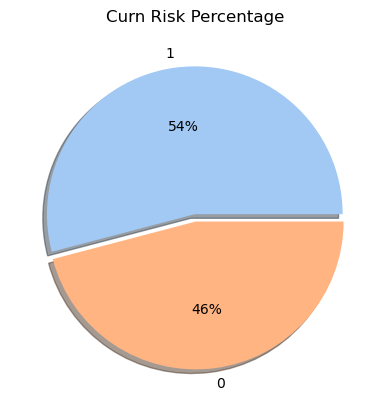

In [33]:
# plotting data on chart
plt.pie(data=data ,x=data.churn_risk_score.value_counts(),labels=data.churn_risk_score.unique(), autopct='%.0f%%', explode = [0, 0.05], shadow=True, colors=sns.color_palette('pastel'))
plt.title('Curn Risk Percentage')
plt.show()

Data customer yang didapat relatif imbang atau balanced

### 4.2. Apakah customer lama cenderung churn?

Text(0.5, 1.0, 'Join Month Customer')

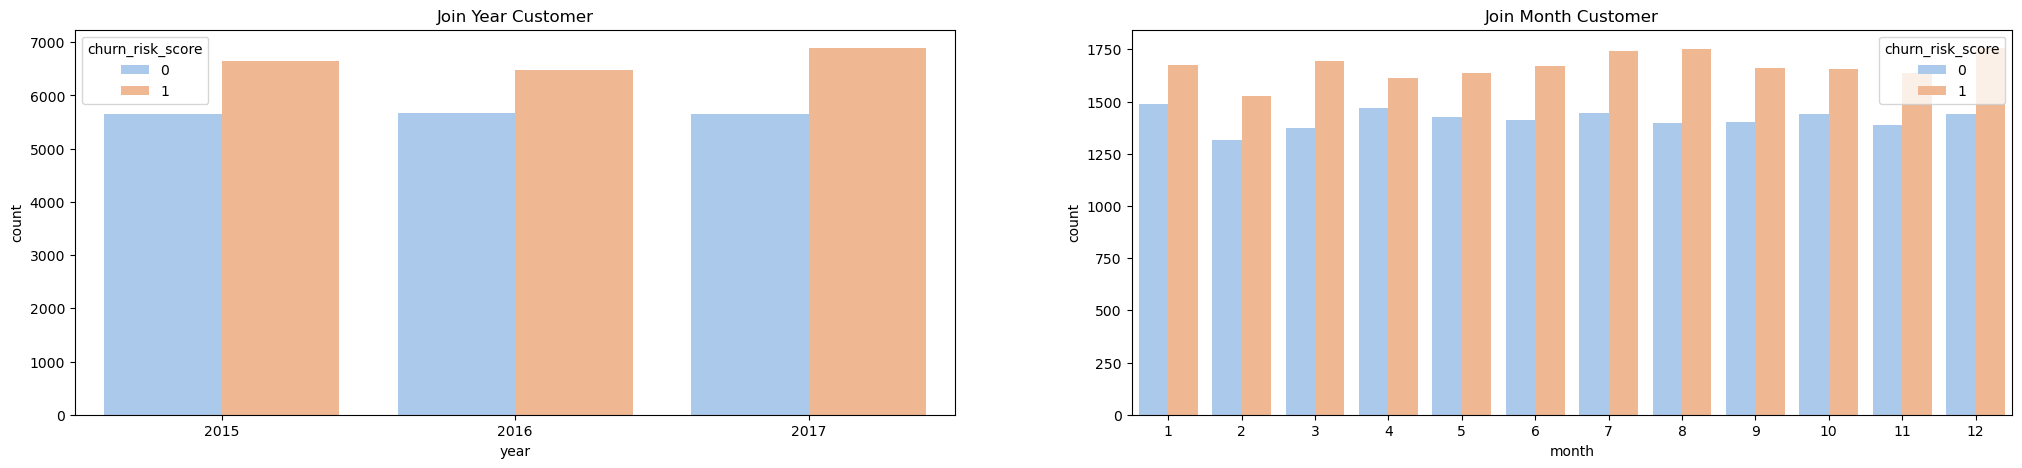

In [34]:
# exktrak tahun, bulan dan tanggal dari kolom date customer join
data['year'] = pd.DatetimeIndex(data['joining_date']).year
data['month'] = pd.DatetimeIndex(data['joining_date']).month
data['day'] = pd.DatetimeIndex(data['joining_date']).day

# plotting
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,5))

sns.countplot(data, x='year', hue='churn_risk_score', fill=True,ax=ax1, palette=sns.color_palette('pastel'))
sns.countplot(data, x='month', hue='churn_risk_score', fill=True,ax=ax2, palette=sns.color_palette('pastel'))
ax1.set_title('Join Year Customer')
ax2.set_title('Join Month Customer')

Resiko churn semua customer ``independen`` dari kapan mereka join, namun secara keseluhuran chance untuk churn lebih besar daripada tidak churn.

### 4.3. Feedback of churn data

In [35]:
data.head(2)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,year,month,day
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,2017,4,5
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1,2017,3,31


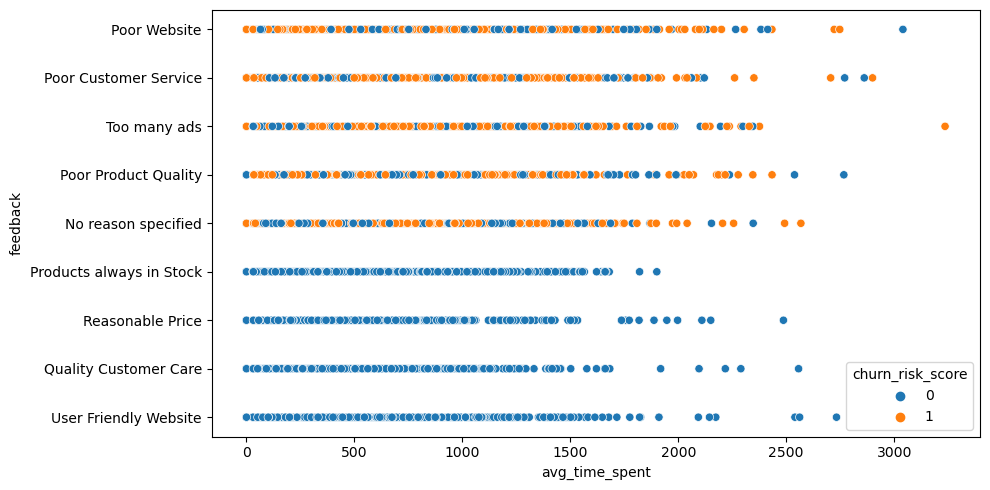

In [36]:
# plot feedback dan churn

plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, y=data['feedback'], x=data['avg_time_spent'], hue='churn_risk_score')

plt.tight_layout()

In [37]:
# presentase feedback dan churn 
for i in data['feedback'].value_counts().index:
    result = round(data[(data.feedback == i) & (data.churn_risk_score == 1)].shape[0]/data['feedback'].value_counts()[i], 2)
    print(i +  ' =', str(result*100) + "%", 'are subject to churn')

Poor Product Quality = 65.0% are subject to churn
No reason specified = 63.0% are subject to churn
Too many ads = 63.0% are subject to churn
Poor Website = 63.0% are subject to churn
Poor Customer Service = 64.0% are subject to churn
Reasonable Price = 0.0% are subject to churn
User Friendly Website = 0.0% are subject to churn
Products always in Stock = 0.0% are subject to churn
Quality Customer Care = 0.0% are subject to churn


Secara umum, feedback adalah fitur yang paling relevan dan memiliki utama dalam menentukan apakah customer memiliki resiko churn.

Dalam case ini, customer yang memberikan feedback negatif seperti : Poor Product Quality, Too many ads, Poor Website, Poor Customer Service, adalah tipe customer yang memiliki churn risk

``Rata- Rata churn risk pada feedback negatif adalah 63% !``

### 4.4. Membership vs  Referral

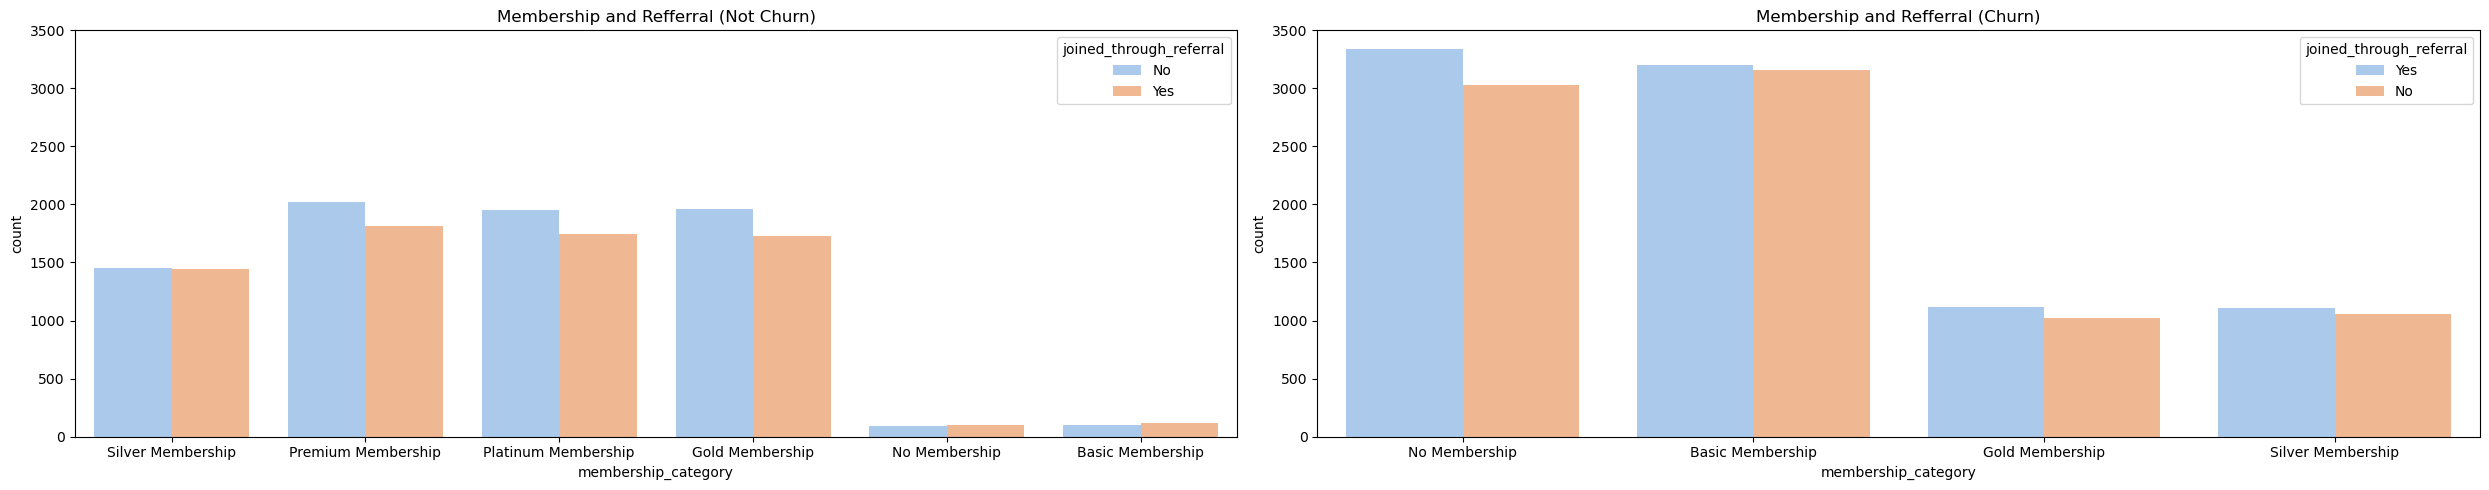

In [38]:
# plot membership
fig, (ax1,ax2) = plt.subplots(1, 2,  figsize=(25, 5))

sns.countplot(data = data[data.churn_risk_score==0],x='membership_category', hue='joined_through_referral', palette=sns.color_palette('pastel'), ax=ax1)
ax1.set_title('Membership and Refferral (Not Churn)')
ax1.set_ylim(0,3500)
sns.countplot(data = data[data.churn_risk_score==1],x='membership_category', hue='joined_through_referral', palette=sns.color_palette('pastel'), ax=ax2)
ax2.set_title('Membership and Refferral (Churn)')
ax2.set_ylim(0,3500)

plt.tight_layout()

Dari plot soal leterkaitan membership ini, churn risk dan referral program, dapat ditarik informasi bahwa:

- Tidak ada data resiko churn pada customer yang memiliki ``membership platinum dan premium``.

- Resiko churn banyak didapatkan pada customer yang ``tidak memiliki membersip, juga customer yang memiliki basic membership``

### 4.5. Churn and Transaction Value

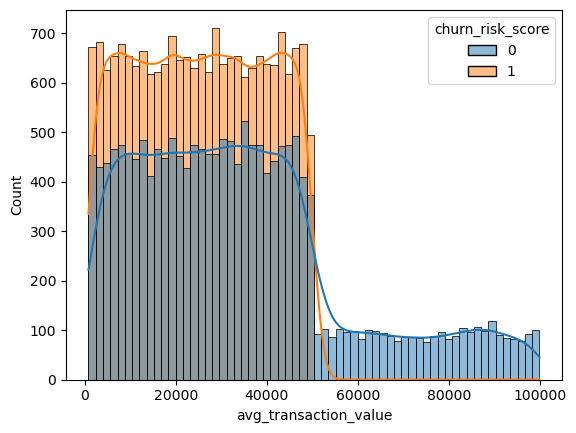

In [39]:
# plot transaction value
sns.histplot(data = data, x='avg_transaction_value', hue='churn_risk_score', kde=True)
plt.show()

In [40]:
# maksimum nilai rata rta transasi customer yang beresiko churn
data[data.churn_risk_score == 1].avg_transaction_value.max()

49997.69

Terlihat bahwa adanya kecenderungan churn jikalau data rata-rata transaksi dibawah 50000

### 4.6. Points in wallet and Churn

Rata-Rata Points in wallet customer CHURN = 573.7290763193597
Rata-Rata Points in wallet customer NOT CHURN = 682.3322740866561


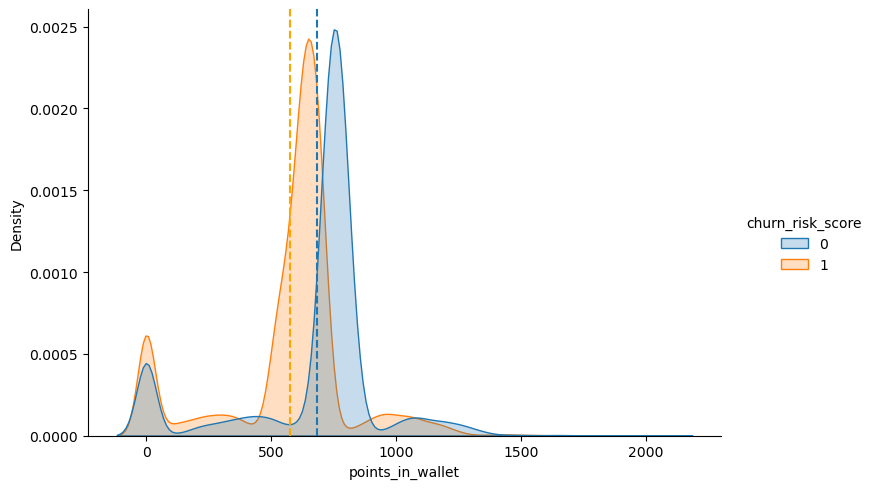

In [41]:
# plotting
sns.displot(data, x='points_in_wallet', hue='churn_risk_score', kind='kde', fill=True, height=5, aspect=1.5)
plt.axvline(data[data.churn_risk_score==1].points_in_wallet.mean(), ls='--', c='orange')
plt.axvline(data[data.churn_risk_score==0].points_in_wallet.mean(), ls='--')
##plt.text(350,0.0020, s=round(data[data.churn_risk_score==1].points_in_wallet.mean(),2), fontsize=10, c='orange', weight='bold')
#plt.text(750,0.0020, s=round(data[data.churn_risk_score==0].points_in_wallet.mean(),2), fontsize=10, c='b', weight='bold')


print('Rata-Rata Points in wallet customer CHURN =', data[data.churn_risk_score==1].points_in_wallet.mean())
print('Rata-Rata Points in wallet customer NOT CHURN =', data[data.churn_risk_score==0].points_in_wallet.mean())

Adanya chance untuk churn ketika customer memiliki points pada wallet sekitar rata rata 573 points. Kemungkinan customer tidak beresiko churn adalah ketika points pada wallet sekitar 682 points

### 4.7. Log-in Activity

avg_transaction_value','avg_frequency_login_days','points_in_wallet

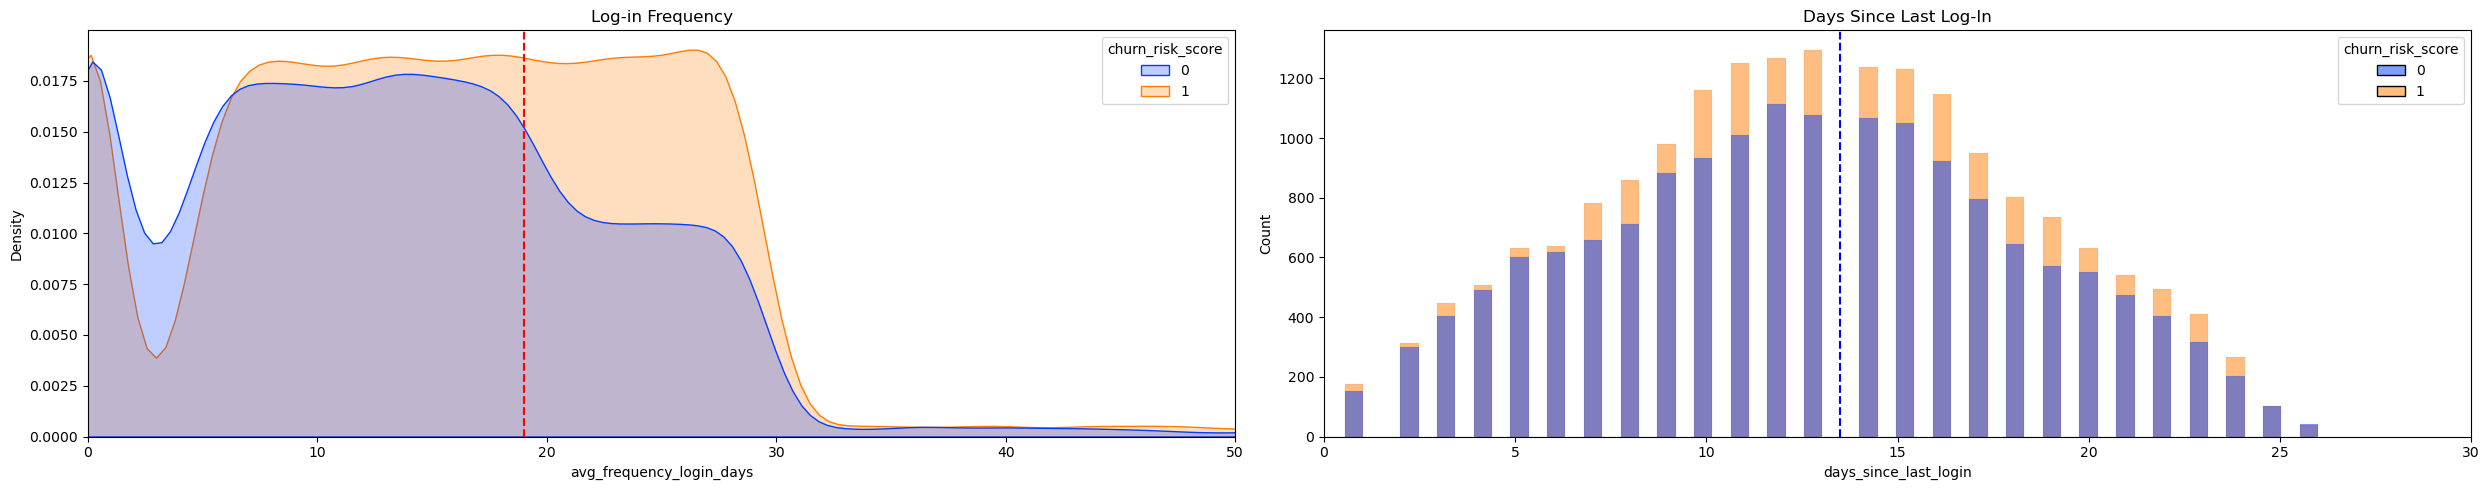

In [42]:
# plot age dan lain ´lain

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25, 5))

sns.kdeplot(data, x='avg_frequency_login_days', hue='churn_risk_score', ax=ax1, palette=sns.color_palette('bright'), fill=True)
ax1.set_xlim(0,50)
ax1.set_title('Log-in Frequency')
ax1.axvline(19, ls='--', c='r')


sns.histplot(data, x='days_since_last_login', hue='churn_risk_score', ax=ax2, palette=sns.color_palette('bright'))
ax2.set_xlim(0,30)
ax2.set_title('Days Since Last Log-In')
ax2.axvline(data[data.churn_risk_score==0].avg_frequency_login_days.mean(), ls='--', c='b')


plt.tight_layout()

Dari plot pertama dapat diketahui bahwa ada indikasi untuk resiko churn pada customer juka mereka memiliki rata rata frekuensi log-in diatas 19.

Ini poin yang sangat menarik, untuk dikaji lebih lanjut oleh team.

In [43]:
data.feedback.unique()

array(['Poor Website', 'Poor Customer Service', 'Too many ads',
       'Poor Product Quality', 'No reason specified',
       'Products always in Stock', 'Reasonable Price',
       'Quality Customer Care', 'User Friendly Website'], dtype=object)

<AxesSubplot: xlabel='feedback', ylabel='avg_frequency_login_days'>

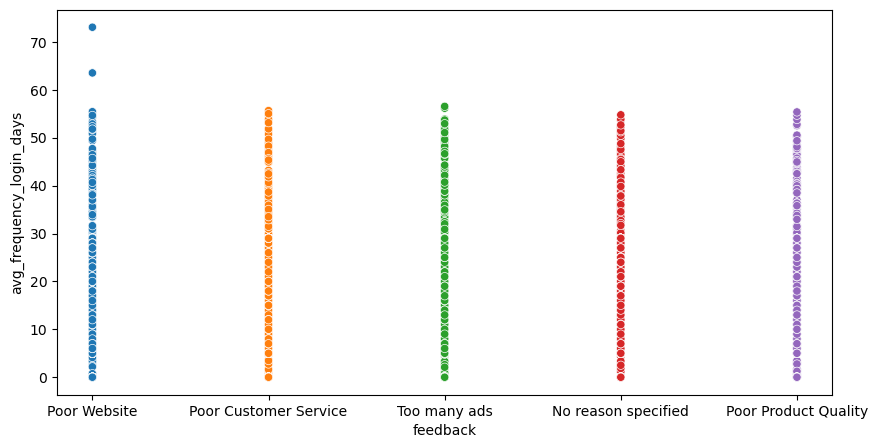

In [44]:
# plot mengapa login banyak tp kok churn?
fig = plt.figure(figsize=(10,5))
sns.scatterplot(data=data[data.churn_risk_score==1] , y='avg_frequency_login_days' ,x='feedback', hue='feedback', legend=None)

<AxesSubplot: xlabel='feedback', ylabel='Count'>

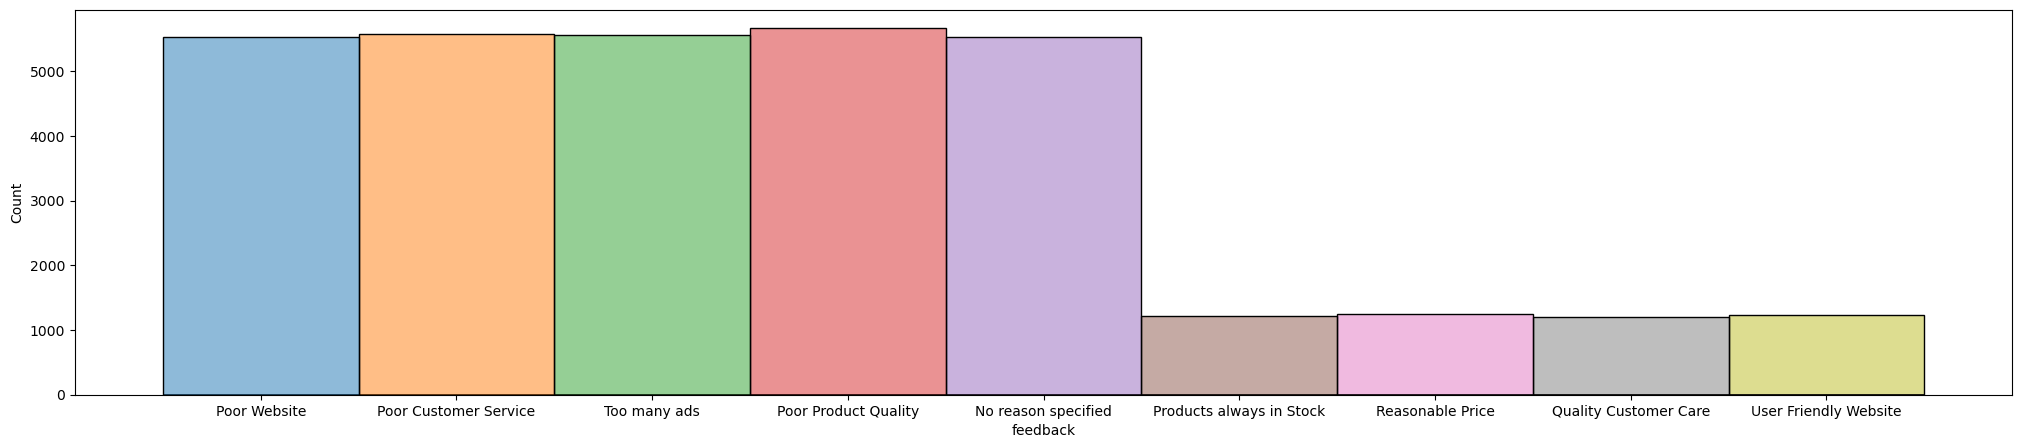

In [45]:
# plot mengapa login banyak tp kok churn?
fig = plt.figure(figsize=(25,5))
sns.histplot(data=data[(data.avg_frequency_login_days>=19&(data.avg_frequency_login_days<30))] ,x='feedback', hue='feedback', legend=None)

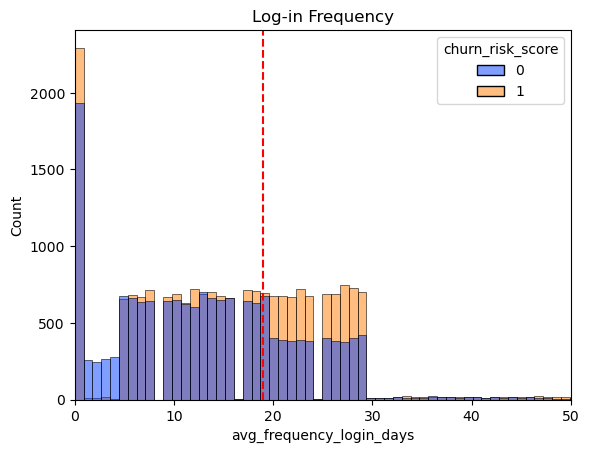

In [46]:
sns.histplot(data, x='avg_frequency_login_days', hue='churn_risk_score', palette=sns.color_palette('bright'), fill=True)
plt.xlim(0,50)
plt.title('Log-in Frequency')
plt.axvline(19, ls='--', c='r')


Terlihat pada plot diatas, untuk customer yang memiliki resiko churn, ada indikasi ``problem pada website``, ini yg menyebabkan mereka sering login lalu logout, log in lagi. Jadi inquiries mereka sulit diselesaikan.

## 5. Feature Engineering

### 5.1. Feature Drop

``Drop fitur untuk yang unique valuenya terlalu banyak dan yang tidak memiliki korelasi yang terlihat pada EDA``

In [47]:
data.head(2)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,year,month,day
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,2017,4,5
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1,2017,3,31


In [48]:
# drop kolom yang memiliki nilai unique yang ianggap terlalu banyak
data = data.drop(['user_id','joining_date','last_visit_time'], axis=1)
data.head(2)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,year,month,day
0,29,F,NaN,No Membership,Yes,Without Offers,NaN,Wi-Fi,4,1184.49,...,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,2017,4,5
1,50,M,NaN,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,11,338.15,...,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1,2017,3,31


### 5.2. Split Train, Val, Test

In [49]:
# splitting between X dan Y
X = data.drop('churn_risk_score', axis=1)
y = data['churn_risk_score']

In [50]:
# split between train set val test
X_train_val, X_test, y_train_val, y_test =  train_test_split(X,y, test_size=0.15, random_state=20)
X_train, X_val, y_train, y_val =  train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=20)

### 5.3 Split to Numerical and categorical

In [51]:
# num columns and cat columns separation
num_columns = X_train.select_dtypes(include='number').columns.tolist()
cat_columns = X_train.select_dtypes(include='object').columns.tolist()

In [52]:
# pembagian lagi berdasarkan cat dan num
X_train_num = X_train.loc[:,num_columns]
X_train_cat= X_train.loc[:,cat_columns]

X_test_num = X_test.loc[:,num_columns]
X_test_cat= X_test.loc[:,cat_columns]


X_val_num = X_val.loc[:,num_columns]
X_val_cat= X_val.loc[:,cat_columns]

In [53]:
# unique value cat data
for col in X_train_cat.columns:
    print(col, X_train_cat[col].nunique())

gender 2
region_category 3
membership_category 6
joined_through_referral 2
preferred_offer_types 3
medium_of_operation 3
internet_option 3
used_special_discount 2
offer_application_preference 2
past_complaint 2
complaint_status 5
feedback 9


### 5.4. Missing Value

In [54]:
data.shape

(37010, 22)

In [55]:
X_train.isnull().sum()

age                                0
gender                            43
region_category                 3848
membership_category                0
joined_through_referral         3884
preferred_offer_types            211
medium_of_operation             3894
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
year                               0
month                              0
day                                0
dtype: int64

In [56]:
X_val.isnull().sum()

age                               0
gender                            8
region_category                 726
membership_category               0
joined_through_referral         718
preferred_offer_types            39
medium_of_operation             691
internet_option                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
year                              0
month                             0
day                               0
dtype: int64

In [57]:
X_test.isnull().sum()

age                               0
gender                            8
region_category                 857
membership_category               0
joined_through_referral         840
preferred_offer_types            38
medium_of_operation             810
internet_option                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
year                              0
month                             0
day                               0
dtype: int64

ada beberapa null values, namun semua akan diimputasi pada pipeline yang numerik menggunakan `median` dan yang categorical menggunakan ``most_frequent``

### 5.5 Scaling 

In [58]:
# concat num
X_train_num_target = pd.concat([X_train_num,y_train], axis=1)
X_train_num_target.head(2)

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year,month,day,churn_risk_score
30811,33,14,326.43,38026.78,8.0,728.199859,2017,3,29,1
32377,40,13,144.60,41787.37,14.0,753.930000,2016,3,9,0


<AxesSubplot: >

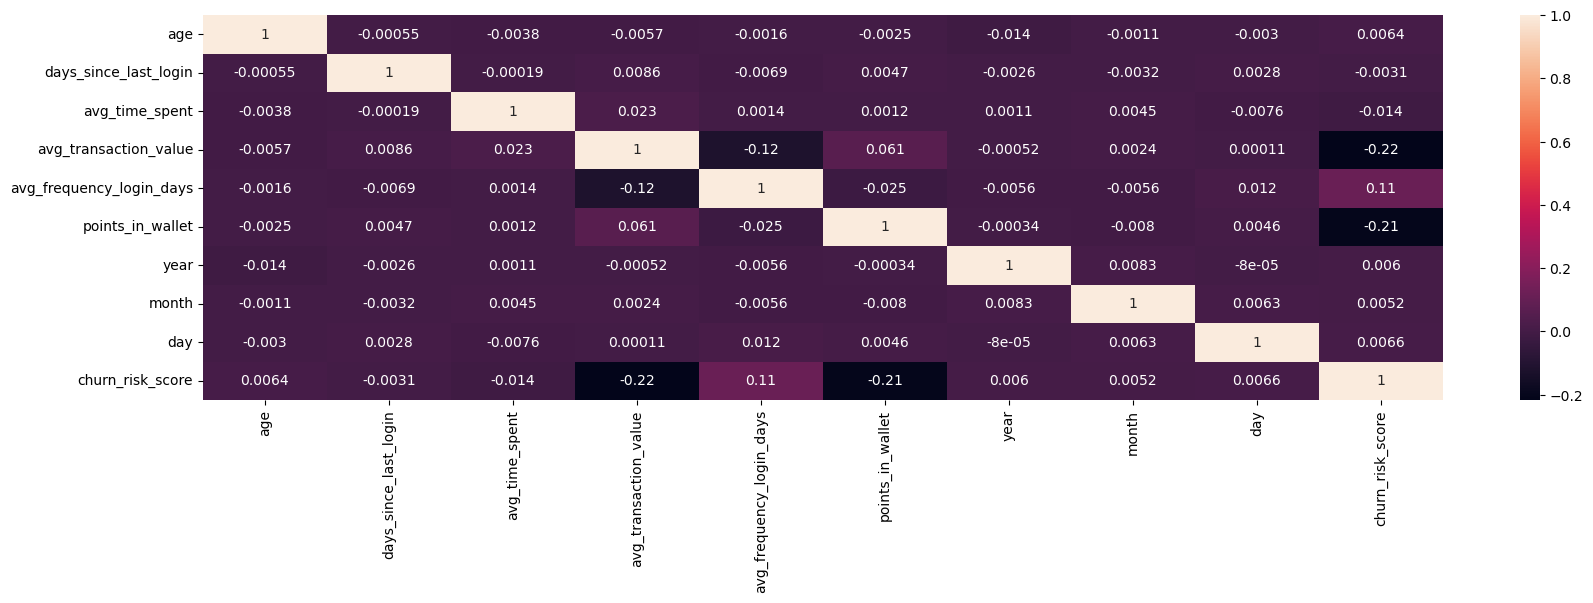

In [59]:
# plot pearson
pearson_num = pd.concat([X_train_num, y_train],axis=1)
plt.figure(figsize=(20,5))
sns.heatmap(pearson_num.corr(), annot=True)

In [60]:
# pemilihan kolom yang memiliki tingkat korelasi tinggi
num_columns_final = ['avg_transaction_value','avg_frequency_login_days','points_in_wallet']

### 5.6. Encoding

In [61]:
# code menggunakan one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

ohe.fit(X_train_cat)
X_train_cat_ohe = ohe.transform(X_train_cat)
X_test_cat_ohe = ohe.transform(X_test_cat)
X_val_cat_ohe = ohe.transform(X_val_cat)


columns_ohe = ohe.get_feature_names(X_train_cat.columns)

X_train_cat_ohe

<26739x47 sparse matrix of type '<class 'numpy.float64'>'
	with 320868 stored elements in Compressed Sparse Row format>

In [62]:
X_train_cat_ohe_df = pd.DataFrame(X_train_cat_ohe.toarray(), columns=columns_ohe )
X_train_cat_ohe_df.head(2)

,gender_F,gender_M,gender_nan,region_category_City,region_category_Town,region_category_Village,region_category_nan,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5.7. Chi2 Test

In [63]:
from scipy.stats import chi2_contingency

# menggunakan chi2 test
results_cat = pd.DataFrame(columns=['Feature', 'Chi-Squared', 'p-value'])

# looping chi2 test
for col in X_train_cat.columns:
    contingency_table = pd.crosstab(y_train, X_train_cat[col])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    results_cat = results_cat.append({'Feature': col, 'Chi-Squared': chi2, 'p-value': p}, ignore_index=True)

results_cat.sort_values(by='p-value',ascending=True)

,Feature,Chi-Squared,p-value
2,membership_category,16647.759455,0.000000e+00
11,feedback,5612.041145,0.000000e+00
4,preferred_offer_types,47.275193,5.424031e-11
3,joined_through_referral,32.337716,1.295737e-08
8,offer_application_preference,11.161353,8.351898e-04
1,region_category,10.803122,4.509536e-03
5,medium_of_operation,10.160007,6.219887e-03
9,past_complaint,3.236359,7.202055e-02
7,used_special_discount,2.783318,9.525065e-02
10,complaint_status,4.969186,2.904738e-01


In [64]:
cat_columns_final = ['membership_category','feedback']

## 6. Feature Selection

In [65]:
# menentukan final dataset yang akan digunakan
X_train_final = X_train.loc[:,num_columns_final+cat_columns_final]
X_test_final = X_test.loc[:,num_columns_final+cat_columns_final]
X_val_final = X_val.loc[:,num_columns_final+cat_columns_final]

X_train_final.head(2)

,avg_transaction_value,avg_frequency_login_days,points_in_wallet,membership_category,feedback
30811,38026.78,8.0,728.199859,Gold Membership,Poor Customer Service
32377,41787.37,14.0,753.930000,Premium Membership,No reason specified


## 7.  Pipeline

In [66]:
# menggunakan pipeline, dengan memasukkan imputer
num_pipe = make_pipeline(SimpleImputer(strategy='median'), 
                        StandardScaler())


cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                        OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipe, num_columns_final),
    ('pipe_cat', cat_pipe, cat_columns_final)
])

In [67]:
# fit and transform dataset final menggunakan pipeline
X_train_final = final_pipeline.fit_transform(X_train_final).toarray()
X_val_final	= final_pipeline.transform(X_val_final).toarray()
X_test_final	= final_pipeline.transform(X_test_final).toarray()

In [68]:
X_test_final

array([[ 1.02758825, -0.28201306, -2.30976806, ...,  0.        ,
         0.        ,  0.        ],
       [-1.344903  ,  0.77127777, -0.25714915, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.73681133, -0.38734215,  0.31868344, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.29865465, -0.49267123, -0.14877543, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.15278982, -0.28201306,  0.20053164, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31876315,  1.50858135,  1.3923108 , ...,  0.        ,
         0.        ,  0.        ]])

## 8. Tensorflow Input Data Pipeline

In [69]:
# input data pipeline
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_final,y_train)).shuffle(5).batch(150)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test_final,y_test)).shuffle(5).batch(150)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_final,y_val)).shuffle(5).batch(150)

Menggunakan Input Data Pipeline dari Tensorflow dengan batch 150

In [70]:
train_pipe

<BatchDataset element_spec=(TensorSpec(shape=(None, 18), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

## 9. Sequential API

Pada bagian pemodelan dan evaluasi, akan difokuskan kepada value ``Recall``.

### 9.1. Model Definition

In [71]:
# clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# create seq API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_sequential = Sequential()

model_sequential.add(Dense(16, activation='relu', input_shape=(18,)))
model_sequential.add(Dense(1, activation='sigmoid')) 

# compile
model_sequential.compile(loss='binary_crossentropy',
                        optimizer='Adam',
                        metrics=['Recall']    
                        ) 

model_sequential.summary()      

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                304       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


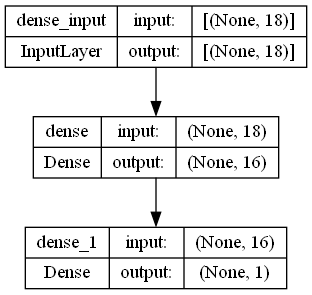

In [72]:
# plot layers
tf.keras.utils.plot_model(model_sequential, show_shapes=True)

mengggunakan basic baseline model dengan 1 hidden dense layer, dengan 16 neuron dan activation function relu.

Fungsi aktivasi pada output lyer digunakan sigmoid karena ini merupakan kasus klasifikasi biner.

Optimizer yang digunakan adalah Adam.

In [98]:
y_train

30811    1
32377    0
12296    0
4013     1
30702    0
        ..
2844     1
9288     0
32919    1
7756     0
12217    0
Name: churn_risk_score, Length: 26739, dtype: int64

### 9.2. Model Training

In [73]:
# Train model

history_seq = model_sequential.fit(train_pipe, epochs=20, validation_data= val_pipe)

Epoch 1/20
179/179 [==============================] - 1s 2ms/step - loss: 0.5920 - recall: 0.9220 - val_loss: 0.4942 - val_recall: 0.8966
Epoch 2/20
179/179 [==============================] - 0s 1ms/step - loss: 0.3999 - recall: 0.8759 - val_loss: 0.3315 - val_recall: 0.8517
Epoch 3/20
179/179 [==============================] - 0s 1ms/step - loss: 0.2905 - recall: 0.8453 - val_loss: 0.2783 - val_recall: 0.8537
Epoch 4/20
179/179 [==============================] - 0s 1ms/step - loss: 0.2619 - recall: 0.8601 - val_loss: 0.2659 - val_recall: 0.8736
Epoch 5/20
179/179 [==============================] - 0s 1ms/step - loss: 0.2540 - recall: 0.8766 - val_loss: 0.2615 - val_recall: 0.8861
Epoch 6/20
179/179 [==============================] - 0s 1ms/step - loss: 0.2504 - recall: 0.8872 - val_loss: 0.2589 - val_recall: 0.8954
Epoch 7/20
179/179 [==============================] - 0s 1ms/step - loss: 0.2479 - recall: 0.8944 - val_loss: 0.2569 - val_recall: 0.9067
Epoch 8/20
179/179 [==============

### 9.3. Model Evaluation

In [74]:
# create Dataframe

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df.tail(5)

,loss,recall,val_loss,val_recall
15,0.224077,0.934013,0.233588,0.937183
16,0.220878,0.935399,0.230430,0.937573
17,0.217900,0.936924,0.227544,0.938353
18,0.215150,0.937894,0.224858,0.939524
19,0.212606,0.938657,0.222380,0.941865


<AxesSubplot: >

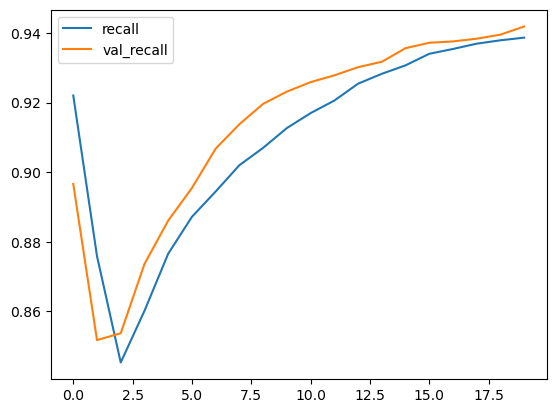

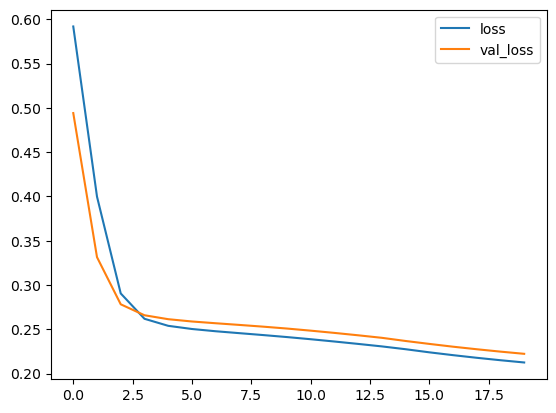

In [75]:
# plot training result
import matplotlib
history_seq_df[['recall', 'val_recall']].plot()
history_seq_df[['loss','val_loss']].plot()

In [76]:
## Model Evaluation Test

from sklearn.metrics import classification_report

y_pred_seq = model_sequential.predict(X_test_final)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 0s 880us/step
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2524
           1       0.92      0.94      0.93      3028

    accuracy                           0.92      5552
   macro avg       0.92      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552



Dari grafik dan report diatas terlihat :

- nilai recall yang cukup baik dengan performa juga yang cukup baik ``0.94``, sejajar dengan test pada evaluation data (unseen data).

- nilai loss yang belum cukup baik dengan nilai rata rata loss sekitar`` 0.22`` pada akhir train, juga pada evaluation data. semakin mendekati 0 semakin baik. Akan dilakukan improvement pada bagian selanjutnya

## 10. Functional API

### 10.1. Model Definition

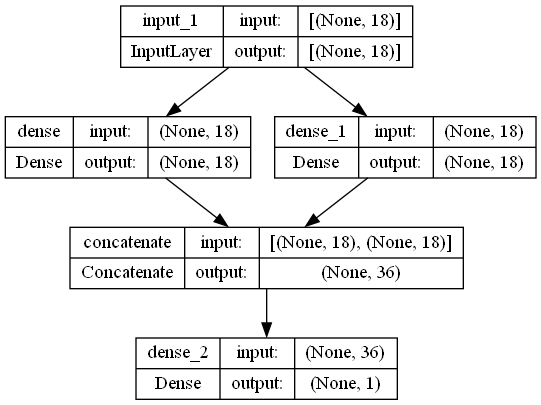

In [77]:
# clear session
seed = 55
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

from keras.layers import Input, Dense, concatenate
from keras.models import Model

input1 = Input(shape=(18,))

x1 = Dense(18, activation='relu')(input1)

x2 = Dense(18, activation='relu')(input1)

merged = concatenate([x1, x2])
predictions = Dense(1, activation='sigmoid')(merged)

model_func = Model(inputs=input1, outputs=predictions)
model_func.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['Recall'])


tf.keras.utils.plot_model(model_func,show_shapes=True)

menggunakan baseline model dengan 2 cabang hidden dense layer yang kemudian di concat pada concate layer.

Dan fungsi aktivasi pada hidden layer digunakan adalah relu.

Fungsi aktivasi pada output lyer digunakan sigmoid karena ini merupakan kasus klasifikasi biner.

Optimizer yang digunakan adalah Adam.

### 10.2. Model Training

In [78]:
# Train [model]
history_func = model_func.fit(train_pipe, epochs=20, validation_data=val_pipe)

Epoch 1/20
179/179 [==============================] - 1s 2ms/step - loss: 0.5189 - recall: 0.8151 - val_loss: 0.3743 - val_recall: 0.8919
Epoch 2/20
179/179 [==============================] - 0s 1ms/step - loss: 0.3006 - recall: 0.8625 - val_loss: 0.2753 - val_recall: 0.8755
Epoch 3/20
179/179 [==============================] - 0s 1ms/step - loss: 0.2585 - recall: 0.8684 - val_loss: 0.2632 - val_recall: 0.9001
Epoch 4/20
179/179 [==============================] - 0s 1ms/step - loss: 0.2514 - recall: 0.8881 - val_loss: 0.2596 - val_recall: 0.9134
Epoch 5/20
179/179 [==============================] - 0s 1ms/step - loss: 0.2485 - recall: 0.8994 - val_loss: 0.2578 - val_recall: 0.9224
Epoch 6/20
179/179 [==============================] - 0s 1ms/step - loss: 0.2467 - recall: 0.9080 - val_loss: 0.2566 - val_recall: 0.9266
Epoch 7/20
179/179 [==============================] - 0s 1ms/step - loss: 0.2454 - recall: 0.9141 - val_loss: 0.2555 - val_recall: 0.9255
Epoch 8/20
179/179 [==============

### 10.3 Model Evaluation

<AxesSubplot: >

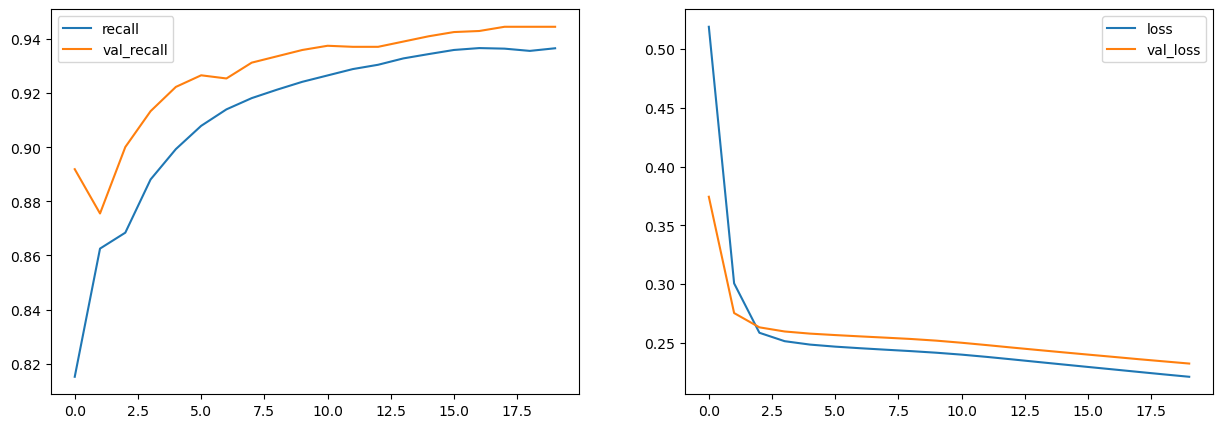

In [79]:
# plot training result
history_func_df = pd.DataFrame(history_func.history)



fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

history_func_df[['recall', 'val_recall']].plot(ax=ax1)
history_func_df[['loss','val_loss']].plot(ax=ax2)

In [80]:
# evaluate t test
## Model Evaluation Test

from sklearn.metrics import classification_report

y_pred_func = model_func.predict(X_test_final)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

174/174 [==============================] - 0s 994us/step
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2524
           1       0.91      0.94      0.92      3028

    accuracy                           0.92      5552
   macro avg       0.92      0.91      0.91      5552
weighted avg       0.92      0.92      0.92      5552



Dari grafik dan report diatas terlihat :

- nilai recall cukup baik yaitu ``0.94``.

- nilai loss yang belum cukup baik dengan nilai rata rata loss sekitar ``0.20`` pada train, juga pada evaluation data. semakin mendekati 0 semakin baik. Akan dilakukan improvement pada bagian selanjutnya

## 11. Model Improvement

### 11.1 Model Improvement Sequential

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                380       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 1)                 2

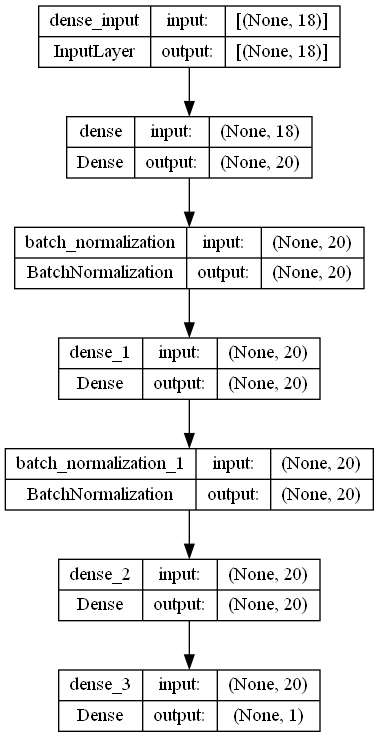

In [81]:
# clear session
seed = 23
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

model_sequential_tuned = Sequential()

model_sequential_tuned.add(Dense(20, activation='relu', input_shape=(18,) , kernel_initializer = 'uniform'))
model_sequential_tuned.add(tf.keras.layers.BatchNormalization())

model_sequential_tuned.add(Dense(20, activation='relu'))
model_sequential_tuned.add(tf.keras.layers.BatchNormalization())

model_sequential_tuned.add(Dense(20, activation='relu')) 
model_sequential_tuned.add(Dense(1, activation='sigmoid')) 

# compile
model_sequential_tuned.compile(loss='binary_crossentropy',
                        optimizer='Adamax',
                        metrics=['Recall']    
                        ) 

model_sequential_tuned.summary()      

tf.keras.utils.plot_model(model_sequential_tuned,show_shapes=True)

Improvement model sequential dilakukan dengan :

- Menambah hidden layer
- menambah fiture layer batch normalization pada 2 hidden layer
- menambahkan epoch pada raining menjadi 100 dan patience 20
- perubahan optimizer ke Adamax 

In [82]:
# Train model menggunakan early stopping
from keras.callbacks import EarlyStopping
history_seq_tuned = model_sequential_tuned.fit(train_pipe, epochs=100, validation_data=val_pipe, callbacks=EarlyStopping(monitor='val_loss', patience=20) )

Epoch 1/100
179/179 [==============================] - 1s 2ms/step - loss: 0.3403 - recall: 0.7872 - val_loss: 0.5837 - val_recall: 1.0000
Epoch 2/100
179/179 [==============================] - 0s 2ms/step - loss: 0.2394 - recall: 0.9118 - val_loss: 0.4287 - val_recall: 0.7862
Epoch 3/100
179/179 [==============================] - 0s 2ms/step - loss: 0.2050 - recall: 0.9337 - val_loss: 0.2652 - val_recall: 0.8689
Epoch 4/100
179/179 [==============================] - 0s 2ms/step - loss: 0.1854 - recall: 0.9379 - val_loss: 0.1956 - val_recall: 0.9321
Epoch 5/100
179/179 [==============================] - 0s 2ms/step - loss: 0.1770 - recall: 0.9418 - val_loss: 0.1812 - val_recall: 0.9360
Epoch 6/100
179/179 [==============================] - 0s 2ms/step - loss: 0.1714 - recall: 0.9447 - val_loss: 0.1735 - val_recall: 0.9415
Epoch 7/100
179/179 [==============================] - 0s 2ms/step - loss: 0.1681 - recall: 0.9466 - val_loss: 0.1703 - val_recall: 0.9450
Epoch 8/100
179/179 [======

<AxesSubplot: >

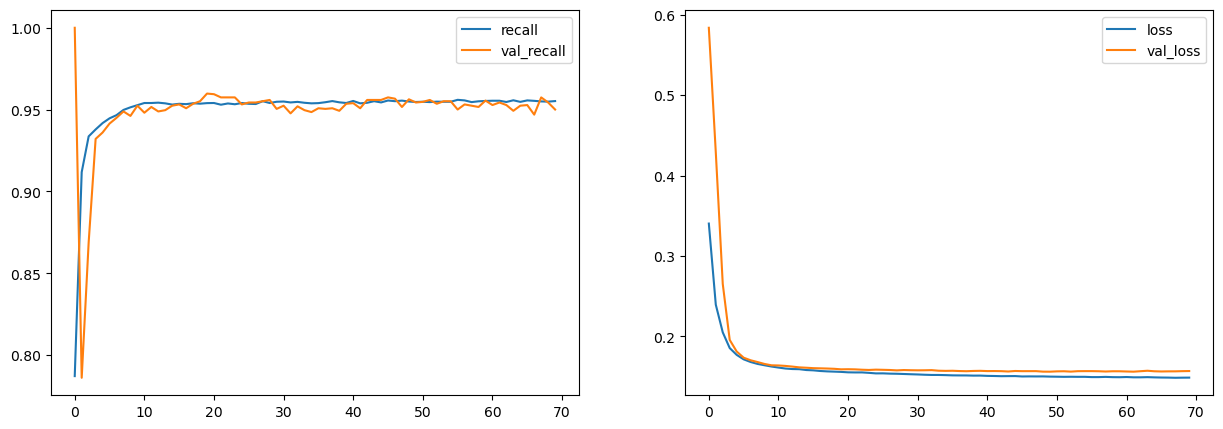

In [83]:
# plot training result
history_seq_tuned_df = pd.DataFrame(history_seq_tuned.history)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
history_seq_tuned_df[['recall', 'val_recall']].plot(ax=ax1)
history_seq_tuned_df[['loss','val_loss']].plot(ax=ax2)

In [84]:
# evaluate t test
## Model Evaluation Test

from sklearn.metrics import classification_report

y_pred_seq_tuned = model_sequential_tuned.predict(X_test_final)
y_pred_seq_tuned = np.where(y_pred_seq_tuned >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_tuned))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2524
           1       0.92      0.95      0.93      3028

    accuracy                           0.93      5552
   macro avg       0.93      0.93      0.93      5552
weighted avg       0.93      0.93      0.93      5552



Dari grafik dan report :

- nilai recall yang sudah sangat baik dengan nilai ``0.96``, lebih baik dari model sequential sebelumnya yaitu dengan nilai ``0.94``. Performanya juga cukup sejajar dengan evaluation dataset, tidaka ada indikasi overfitting maupun underfitting.  Tidak ada gradient vanishing atau exploding.

- nilai loss yang cukup baik dengan nilai rata-rata loss sekitar ``0.15`` pada train, juga pada evaluation data. Nilai loss menegecil dari sebelumnya ``0.22``. Performanya juga terlihat sangat stabil setelah disejajarkan dengan evaluation data loss.

### 11.2 Model Improvement Functional

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 20)           380         ['input_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 20)           380         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 20)           380         ['input_1[0][0]']                
                                                                                              

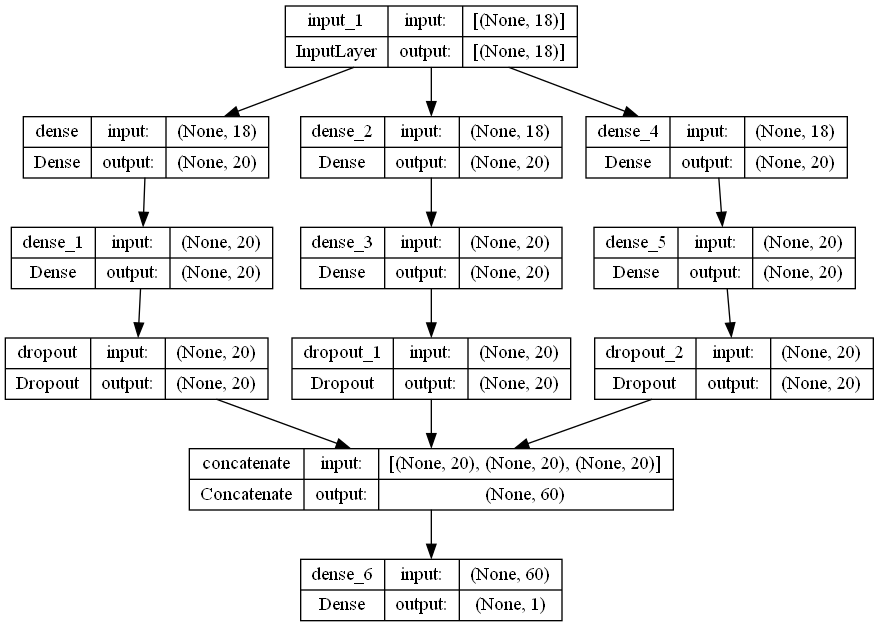

In [85]:
# clear session
seed = 39
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)


input_layer = Input(shape=(18,))

hidden_layer1 = Dense(20, activation ='relu')(input_layer)
hidden_layer1 = Dense(20, activation ='relu')(hidden_layer1)
hid1_out1 = layers.Dropout(0.5)(hidden_layer1)

hidden_layer2 = Dense(20, activation ='relu')(input_layer) 
hidden_layer2 = Dense(20, activation ='relu')(hidden_layer2)
hid1_out2 = layers.Dropout(0.5)(hidden_layer2)


hidden_layer3 = Dense(20, activation ='relu')(input_layer)
hidden_layer3 = Dense(20, activation ='relu')(hidden_layer3)
hid1_out3 = layers.Dropout(0.5)(hidden_layer3)


concat_layer = concatenate([hid1_out1, hid1_out2,hid1_out3])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional_tuned = Model(inputs= input_layer, outputs = output_layer)

#compile
model_functional_tuned.compile(loss='binary_crossentropy',
                        optimizer='Adamax',
                        metrics=['Recall']    
                        ) 


model_functional_tuned.summary()

tf.keras.utils.plot_model(model_functional_tuned,show_shapes=True)

Improvement model functional dilakukan dengan :

- Menambah hidden layer dan percabangan
- menambah fiture layer dropout dengan threshold 0.5 pada ketiga cabang hidden layer.
- menambahkan epoch pada raining menjadi 150 dan patience 5
- perubahan optimizer menggunakan adamax 

In [86]:
# Train tuned model
from keras.callbacks import EarlyStopping

history_func_tuned = model_functional_tuned.fit(train_pipe, epochs=150, validation_data=val_pipe, callbacks=EarlyStopping(monitor='val_loss', patience=5))


Epoch 1/150
179/179 [==============================] - 2s 2ms/step - loss: 0.5626 - recall: 0.8508 - val_loss: 0.4302 - val_recall: 0.8767
Epoch 2/150
179/179 [==============================] - 0s 2ms/step - loss: 0.3644 - recall: 0.8580 - val_loss: 0.2982 - val_recall: 0.8299
Epoch 3/150
179/179 [==============================] - 0s 2ms/step - loss: 0.2953 - recall: 0.8497 - val_loss: 0.2731 - val_recall: 0.8318
Epoch 4/150
179/179 [==============================] - 0s 2ms/step - loss: 0.2765 - recall: 0.8623 - val_loss: 0.2660 - val_recall: 0.8498
Epoch 5/150
179/179 [==============================] - 0s 2ms/step - loss: 0.2693 - recall: 0.8677 - val_loss: 0.2622 - val_recall: 0.8638
Epoch 6/150
179/179 [==============================] - 0s 2ms/step - loss: 0.2643 - recall: 0.8733 - val_loss: 0.2596 - val_recall: 0.8728
Epoch 7/150
179/179 [==============================] - 0s 2ms/step - loss: 0.2613 - recall: 0.8784 - val_loss: 0.2576 - val_recall: 0.8884
Epoch 8/150
179/179 [======

<AxesSubplot: >

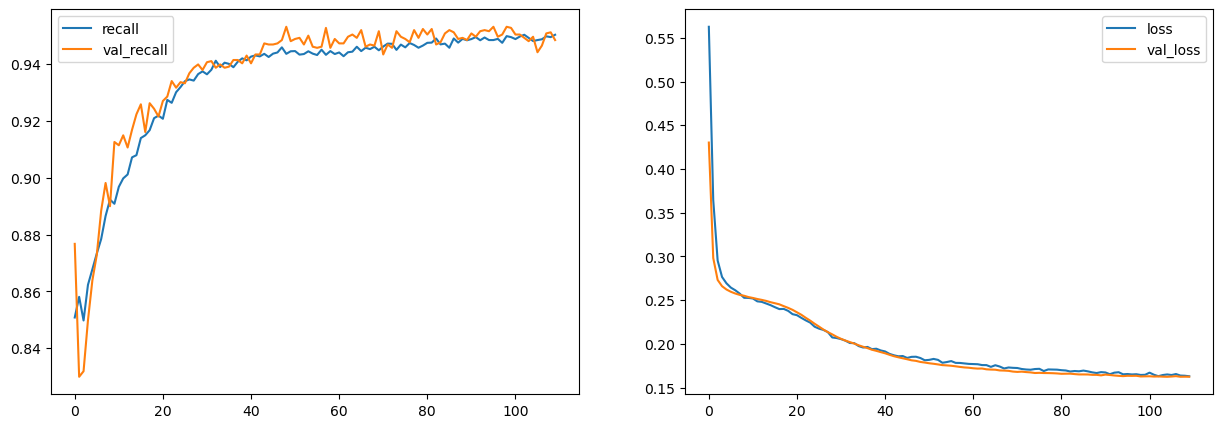

In [87]:
import matplotlib

history_func_tuned_df= pd.DataFrame(history_func_tuned.history)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

history_func_tuned_df[['recall', 'val_recall']].plot(ax=ax1)
history_func_tuned_df[['loss','val_loss']].plot(ax=ax2)

In [88]:
# evaluate t test
## Model Evaluation Test

from sklearn.metrics import classification_report

y_pred_func_tuned = model_functional_tuned.predict(X_test_final)
y_pred_func_tuned = np.where(y_pred_func_tuned >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_tuned))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2524
           1       0.91      0.94      0.93      3028

    accuracy                           0.92      5552
   macro avg       0.92      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552



Dari grafik dan report :

- nilai recall yang sudah sangat baik dengan nilai ``0.95``, lebih baik dari model functional sebelumnya yaitu dengan nilai recall ``0.94``. Performanya juga cukup sejajar dengan evaluation dataset, tidak ada indikasi overfitting maupun underfitting. Tidak ada gradient vanishing atau exploding.

- nilai loss yang cukup baik dengan nilai rata-rata loss sekitar ``0.16`` pada train, juga pada evaluation data. Nilai loss menegecil dari sebelumnya ``0.20``. Performanya juga terlihat sangat stabil setelah disejajarkan dengan evaluation data loss. Bahkan cenderung terus menurun.

## 12. Model Saving

Model yang akan dipilih adalah ``Model ANN Sequential`` yang telah di improve.

In [89]:
# save pipeline

import pickle
import json


with open('final_pipeline.pkl','wb') as file_1:
    pickle.dump(final_pipeline, file_1)

In [90]:
# freeze model
model_sequential_tuned.trainable = False
model_sequential_tuned.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                380       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [91]:
# save ANN Model
model_sequential_tuned.save('churn_risk_model.h5')

## 14. Conclussion

Dari project ini ada beberapa hal yang dapat disimpulkan yaitu :

Data Analysis :

Dari keseluruhan data yang didapat memang ada kecenderungan customer untuk memiliki risk churn. Dan dari customer yang memiliki kecenderungan untuk churn dudapatkan beberapa indikasi atau parameter untuk yang menyebabkannya, diantaranya adalah:

- Dari segi membership, customer yang tidak memiliki membership atau hanya memiliki basic membership, mempunyai resiko churn yang lebih besar. Disisi lain, customer yang memiliki membership kelas atas seperti premium dan platinum mmebership tidak memiliki resiko churn sama sekali.

- Lalu dihitung dari jumlah transaksinya, jika rata-rata jumlah transaksi value customer berada diatas 50.000 USD, resiko churn nya hampr tidak ada. Dan Sejalan dengan jumlah transaksinya, semakin banyak jumlah points mereka di wallet, semakin kecil resiko pelanggan yang churn.

- Untuk aktivitas mereka log-in, semakin sering sering log in, justru semakin besar resiko untuk mereka churn. Seringnya Log-In ini bisa disebabkan karena adanya performa website yang buruk karena customer mungkin kesulitan dan membutuhkan waktu lama untuk memenuhi inquiries mereka.


Modeling :

Alat ukur performa untuk pemodelan yang diambil adalah ``Recall``, karena pihak perusahaan ingin mendeteksi sebanyak-banyaknya customer yang memiliki resiko churn.

Untuk pemodelan, dilakukan dua kali pemodelan ANN dengan dua arsitektur berebda, yaitu Sequential dan Functional. Bada model baseline (awal) maupun yang sudah diimprove, ditemukan bahwa model ``sequential`` yang memiliki performa yang lebih baik dibandingkan dengan functional dengan ``Recall 0.96``, juga nilai ``loss yang lebih rendah``. Dari segi konsistensi performanya dapat diakatakan bahwa kedua model sama-sama konsisten karena telah diuji dari data validasi kemudian data test, tidak terlihat adanya underfitting ataupun overfitting.

## 15. Reccomendation

Bussiness Reccomendation :

- Merevisi fasilitas di tiap membership, yang pertama adalah untuk meningkatkan lagi fasilitas dibagian basic membership, kemudian disisi lain, jangan sampai membership premium atau platinum menurun. Lebih baik disesuaikan lagi proposionalnya dari masing masing tipe membership.

- Pemberian sistem poin sudah sangat baik, alahkan baiknya ditambahkan lagi pemberian hadiah kecil kecil untuk pelanggan yang memiliki poin sedikit. Karena dengan itu pelanggan akan merasa poin nya bisa bermanfaat dan pada akhirnya menurunkan resiko churn mereka.

- Untuk aktivitas log-in sendiri, ini menarik, dimana yang sering log in malah yang memiliki kecenderungan churn lebih besar. Seringnya log in ini dapat disebabkan karena adanya performa yang yang buruk pada website. Direkomendasikan kepada bagian IT team untuk menelaah lebih lanjut kendalanya.


Modeling :

- Untuk model sendiri sejauh ini sudah lumayan baik, metrics recall yang ditetapkan juga sudah memenuhi standar. Namun satu sisi untuk loss value pada setiap model rasanya perlu diperbaiki lagi agar bisa sekecil mungkin sampai mendekati 0.